In [70]:
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt



In [71]:

def create_tema(stock: pd.DataFrame, MA_period:int ) -> pd.Series:

    ema1 = ta.ema(stock['Close'], length=MA_period)

    # Calculate the second EMA
    ema2 = ta.ema(ema1, length=MA_period)

    # Calculate the third EMA
    ema3 = ta.ema(ema2, length=MA_period)

    # Calculate TEMA
    tema = 3 * (ema1 - ema2) + ema3
    #stock[f'tema_{MA_period}'] = tema
    return tema



In [72]:

# Define your custom strategy using CustomStrategy
CustomStrategy = ta.Strategy(
    name="Customize technical indicator",
    description="adding TI",
    ta=[
        {"kind": "natr", 'length':3 },
        {"kind": "rsi", 'length':3 },
        {"kind": "adx", 'length':3 },
        {"kind": "cci", 'length':3 },
        {"kind": "roc", 'length':3 },
        {"kind": "stoch", 'length':3 },
        {"kind": "willr", 'length':3 },
        {"kind": "obv"},
        {"kind": "macd"},
        {"kind": "bbands", 'length':3},
    ]
)

In [73]:
def create_min_max_mid_price(stock: pd.DataFrame, period:int ) -> pd.Series:
    stock[f'min_price_{period}'] = stock['Low'].rolling(window=period).min()
    stock[f'max_price_{period}'] = stock['High'].rolling(window=period).max()
    stock['mid_price'] = (stock['High'] + stock['Low']) / 2


In [74]:
def calculate_MA_smoothness( ma:pd.Series):
    diff_i = ma -ma.shift(1)
    diff_i = diff_i.dropna()
    smooth =(diff_i-diff_i.shift(1)).dropna()
    smooth = smooth.abs().mean()
    return smooth
def calculate_MA_lag(stock: pd.DataFrame, ma:pd.Series):
    lag = (stock['Close']-ma).dropna()
    lag= lag.abs().mean()
    return lag

In [75]:
df = pd.DataFrame()
#data = pd.read_csv('/Users/hieudao/Desktop/ai/do_an/datas/AAPL_stock.csv')
test = df.ta.ticker("amd")
test.ta.strategy(CustomStrategy)
create_min_max_mid_price(test, 3)
test['tema_2'] = create_tema(test, 2)
test['tema_100'] = create_tema(test,100)
test.tail(1)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,NATR_3,RSI_3,ADX_3,...,BBL_3_2.0,BBM_3_2.0,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_2,tema_100
Date,,,,,,,,,,,,,,,,,,,,,
2023-07-07 00:00:00-04:00,114.160004,115.330002,113.040001,113.169998,37135100,0.0,0.0,2.585816,44.88245,35.068771,...,112.892016,113.533333,114.174649,1.129741,0.216727,110.309998,117.660004,114.185001,113.123297,121.618117


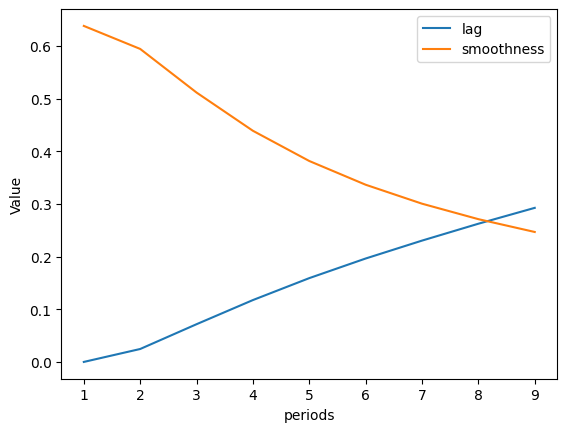

In [76]:
periods = []
lag = []
smoothness = []

for i in range(1,10):
    tema = create_tema(test,i)    
    periods.append(i)
    lag.append(calculate_MA_lag(test, tema))
    smoothness.append(calculate_MA_smoothness(tema))
# Plotting
plt.plot(periods, lag, label='lag')
plt.plot(periods, smoothness, label='smoothness')

plt.xlabel('periods')
plt.ylabel('Value')
plt.legend()
plt.show()

In [77]:
test['tema_8'] = create_tema(test,8)
test

,Open,High,Low,Close,Volume,Dividends,Stock Splits,NATR_3,RSI_3,ADX_3,...,BBM_3_2.0,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_2,tema_100,tema_8
Date,,,,,,,,,,,,,,,,,,,,,
1980-03-17 00:00:00-05:00,0.000000,3.302083,3.125000,3.145833,219600,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.213542,NaN,NaN,NaN
1980-03-18 00:00:00-05:00,0.000000,3.125000,2.937500,3.031250,727200,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.031250,3.088542,NaN,NaN
1980-03-19 00:00:00-05:00,0.000000,3.083333,3.020833,3.041667,295200,0.0,0.0,4.452049,NaN,NaN,...,3.072917,3.176386,6.734284,0.348991,2.937500,3.302083,3.052083,3.043403,NaN,NaN
1980-03-20 00:00:00-05:00,0.000000,3.062500,3.010417,3.010417,159600,0.0,0.0,3.114179,7.792439,NaN,...,3.027778,3.053762,1.716353,0.165925,2.937500,3.125000,3.036458,3.009838,NaN,NaN
1980-03-21 00:00:00-05:00,0.000000,3.020833,2.906250,2.916667,130800,0.0,0.0,3.571419,3.022761,NaN,...,2.989584,3.095813,7.106647,0.156797,2.906250,3.083333,2.963542,2.918403,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30 00:00:00-04:00,113.029999,114.690002,112.410004,113.910004,53331900,0.0,0.0,3.091800,74.737893,41.386671,...,111.773333,114.918804,5.628303,0.839642,107.629997,114.690002,113.550003,113.867390,121.104594,110.790179
2023-07-03 00:00:00-04:00,115.160004,116.730003,114.510002,115.820000,31860000,0.0,0.0,2.737813,83.109892,51.287612,...,113.656667,117.413346,6.610574,0.787932,109.839996,116.730003,115.620003,115.864276,121.355605,113.230480
2023-07-05 00:00:00-04:00,116.099998,117.660004,113.860001,113.949997,49501600,0.0,0.0,3.058771,55.902291,60.012046,...,114.560000,116.342208,3.111396,0.328863,112.410004,117.660004,115.760002,114.120879,121.479762,113.750856


In [78]:
abc = test.dropna()
abc

,Open,High,Low,Close,Volume,Dividends,Stock Splits,NATR_3,RSI_3,ADX_3,...,BBM_3_2.0,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_2,tema_100,tema_8
Date,,,,,,,,,,,,,,,,,,,,,
1980-08-06 00:00:00-04:00,0.000000,4.333333,4.218750,4.239583,351600,0.0,0.0,3.193439,57.558179,67.457227,...,4.305555,4.408089,4.762848,0.178289,4.218750,4.416667,4.276042,4.244861,3.017500,4.373309
1980-08-07 00:00:00-04:00,0.000000,4.270833,4.208333,4.218750,218400,0.0,0.0,2.345345,52.183414,53.444589,...,4.274305,4.403105,6.026714,0.284335,4.208333,4.416667,4.239583,4.213865,3.087458,4.334732
1980-08-08 00:00:00-04:00,0.000000,4.333333,4.260417,4.270833,471600,0.0,0.0,2.499832,64.584952,51.885376,...,4.243055,4.285864,2.017800,0.824443,4.208333,4.333333,4.296875,4.265330,3.157696,4.329951
1980-08-11 00:00:00-04:00,0.000000,4.416667,4.270833,4.416667,542400,0.0,0.0,2.859595,83.049391,57.421407,...,4.302083,4.469616,7.788452,0.841974,4.208333,4.416667,4.343750,4.412216,3.233647,4.397240
1980-08-12 00:00:00-04:00,0.000000,4.500000,4.333333,4.354167,445200,0.0,0.0,3.364200,62.201514,64.956983,...,4.347222,4.466700,5.496718,0.529063,4.260417,4.500000,4.416667,4.362558,3.302935,4.398252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30 00:00:00-04:00,113.029999,114.690002,112.410004,113.910004,53331900,0.0,0.0,3.091800,74.737893,41.386671,...,111.773333,114.918804,5.628303,0.839642,107.629997,114.690002,113.550003,113.867390,121.104594,110.790179
2023-07-03 00:00:00-04:00,115.160004,116.730003,114.510002,115.820000,31860000,0.0,0.0,2.737813,83.109892,51.287612,...,113.656667,117.413346,6.610574,0.787932,109.839996,116.730003,115.620003,115.864276,121.355605,113.230480
2023-07-05 00:00:00-04:00,116.099998,117.660004,113.860001,113.949997,49501600,0.0,0.0,3.058771,55.902291,60.012046,...,114.560000,116.342208,3.111396,0.328863,112.410004,117.660004,115.760002,114.120879,121.479762,113.750856


In [79]:
test.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'NATR_3', 'RSI_3', 'ADX_3', 'DMP_3', 'DMN_3', 'CCI_3_0.015', 'ROC_3',
       'STOCHk_14_3_3', 'STOCHd_14_3_3', 'WILLR_3', 'OBV', 'MACD_12_26_9',
       'MACDh_12_26_9', 'MACDs_12_26_9', 'BBL_3_2.0', 'BBM_3_2.0', 'BBU_3_2.0',
       'BBB_3_2.0', 'BBP_3_2.0', 'min_price_3', 'max_price_3', 'mid_price',
       'tema_2', 'tema_100', 'tema_8'],
      dtype='object')

In [80]:
correlation_matrix = test.corr()
correlation_scores = correlation_matrix.unstack().sort_values(ascending=False)



In [81]:
test = test.drop(columns=['Dividends', 'MACDh_12_26_9', 'MACDs_12_26_9', 'DMP_3', 'DMN_3','Stock Splits'])


In [82]:
test.columns
test = test.dropna()

In [83]:
test.to_csv('clean_amd.csv')

In [84]:
test.tail(1)

,Open,High,Low,Close,Volume,NATR_3,RSI_3,ADX_3,CCI_3_0.015,ROC_3,...,BBM_3_2.0,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_2,tema_100,tema_8
Date,,,,,,,,,,,,,,,,,,,,,
2023-07-07 00:00:00-04:00,114.160004,115.330002,113.040001,113.169998,37135100,2.585816,44.88245,35.068771,0.253154,-2.288034,...,113.533333,114.174649,1.129741,0.216727,110.309998,117.660004,114.185001,113.123297,121.618117,113.66576


In [85]:
def calculate_volatility(name ,data: pd.DataFrame):
    # Calculate the daily logarithmic returns
    
    data['LogReturns'] = np.log(data['Close']/data['Close'].shift(1))

    data.dropna()
    mean_log_return = np.mean(data['LogReturns'])
    
    # Calculate the squared deviation using .loc accessor and avoid the SettingWithCopyWarning
    data.loc[:, 'squared_deviation'] = data['LogReturns'].map(lambda x: (x - mean_log_return) ** 2).copy()
    
    # Reset the index
    total = data['squared_deviation'].sum()
    hv = np.sqrt(22*total/(data.shape[0]-1))
    return (name,hv)
a = df.ta.ticker("amd")
#a = pd.read_csv('./datas/PEP_stock.csv')
print(calculate_volatility('USD', a ))
a

('USD', 0.17612724890939518)


/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,LogReturns,squared_deviation
Date,,,,,,,,,
1980-03-17 00:00:00-05:00,0.000000,3.302083,3.125000,3.145833,219600,0.0,0.0,NaN,NaN
1980-03-18 00:00:00-05:00,0.000000,3.125000,2.937500,3.031250,727200,0.0,0.0,-0.037104,0.001401
1980-03-19 00:00:00-05:00,0.000000,3.083333,3.020833,3.041667,295200,0.0,0.0,0.003431,0.000010
1980-03-20 00:00:00-05:00,0.000000,3.062500,3.010417,3.010417,159600,0.0,0.0,-0.010327,0.000114
1980-03-21 00:00:00-05:00,0.000000,3.020833,2.906250,2.916667,130800,0.0,0.0,-0.031637,0.001022
...,...,...,...,...,...,...,...,...,...
2023-06-30 00:00:00-04:00,113.029999,114.690002,112.410004,113.910004,53331900,0.0,0.0,0.023719,0.000547
2023-07-03 00:00:00-04:00,115.160004,116.730003,114.510002,115.820000,31860000,0.0,0.0,0.016629,0.000266
2023-07-05 00:00:00-04:00,116.099998,117.660004,113.860001,113.949997,49501600,0.0,0.0,-0.016278,0.000276
